In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from numpy.linalg import inv

In [6]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

#points
X = diabetes_X[0:50]

# target values
y = diabetes.target[0:50]

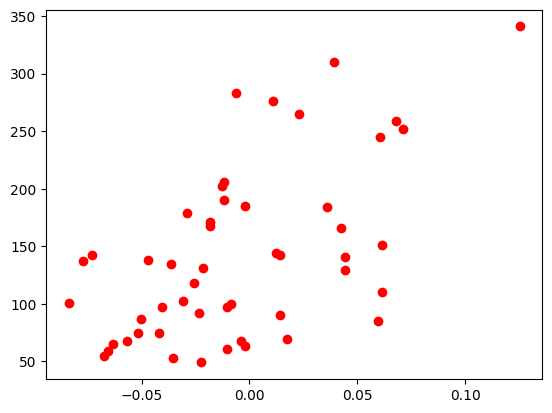

In [7]:
plt.scatter(X, y,  color='red')
plt.show()

In [8]:
X=np.insert(X, 0, values=1.0, axis=1)

In [9]:
sig = 0.5
cov = np.identity(X.shape[1])*sig**2

In [10]:
def get_Weight(xq):
    m = X.shape[0]
    W = np.zeros((m,m))
    for i in range(0,m):
        W[i,i] = np.exp(-0.5*((X[i]-xq).T).dot(inv(cov)).dot((X[i]-xq)))
    return W

In [11]:
def predict(Xte):
    m = Xte.shape[0]
    yhat = np.zeros(m)
    for i in range(0,Xte.shape[0]):
        W = get_Weight(Xte[i])
        yi = inv((X.T).dot(W).dot(X)).dot(X.T).dot(W).dot(y)
        yhat[i] = Xte[i].dot(yi)
    return yhat

In [12]:
yhat = predict(X)

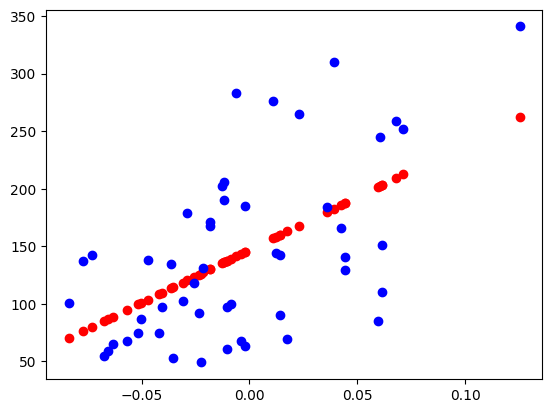

In [13]:
plt.scatter(X[:,1], yhat,  color='red')
plt.scatter(X[:,1], y,  color='blue')
plt.show()